In [1]:
%pylab inline
import omp
import numpy as np

Populating the interactive namespace from numpy and matplotlib


###Generate synthetic data

In [2]:
# generate a grid
npts = 64
domain = np.linspace(0, 1, npts)

# generate a dictionary and manufactured solution
X = np.array([np.cos(2 * np.pi * m * domain) for m in range(4)]).T
coef = [0., 1., 0., .5]
y = np.dot(X, coef)

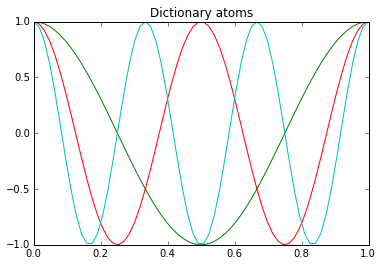

In [3]:
figure()
plot(domain, X)
title('Dictionary atoms')

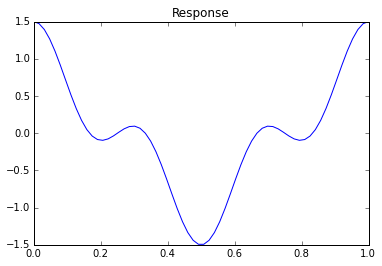

In [4]:
figure()
plot(domain, y)
title('Response')

###Non-negative reconstruction

In [5]:
# reconstruct
result = omp.omp(X, y)
print('Solution: %r' % result.coef)

{'standardize': False, 'fit_intercept': False, 'ncoef': None, 'ztol': 1e-12, 'nnoneg': True, 'maxit': 200, 'tol': 0.001}

Iteration, relative error, number of non-zeros
0, 0.441599813191, 1
1, 2.57637177582e-16, 2

Converged.
Solution: array([ 0. ,  1. ,  0. ,  0.5])


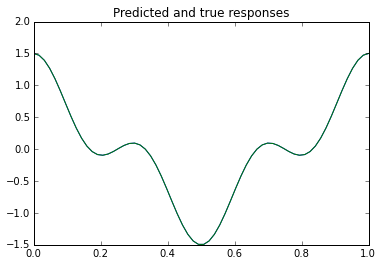

In [6]:
figure()
plot(domain, y)
plot(domain, result.ypred)
title('Predicted and true responses')

###Non-negative reconstruction that "fails"

In [7]:
coef = [0., 1., 0., -0.5]
y2 = np.dot(X, coef)

result2 = omp.omp(X, y2)
print('Solution %r' % result2.coef)

{'standardize': False, 'fit_intercept': False, 'ncoef': None, 'ztol': 1e-12, 'nnoneg': True, 'maxit': 200, 'tol': 0.001}

Iteration, relative error, number of non-zeros
0, 0.452607104422, 1
All residual covariances are below threshold.
Solution array([ 0.        ,  0.98461538,  0.        ,  0.        ])


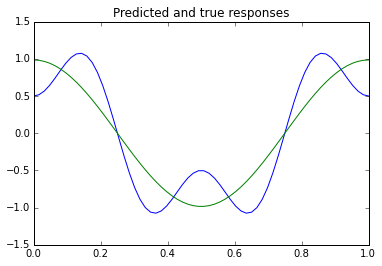

In [8]:
figure()
plot(domain, y2)
plot(domain, result2.ypred)
title('Predicted and true responses')

###Unconstrained reconstruction 

In [9]:
result3 = omp.omp(X, y2, nonneg=False)
print('Solution %r' % result3.coef)

{'standardize': False, 'fit_intercept': False, 'ncoef': None, 'ztol': 1e-12, 'nnoneg': False, 'maxit': 200, 'tol': 0.001}

Iteration, relative error, number of non-zeros
0, 0.452607104422, 1
1, 1.72194121442e-16, 2

Converged.
Solution array([ 0. ,  1. ,  0. , -0.5])


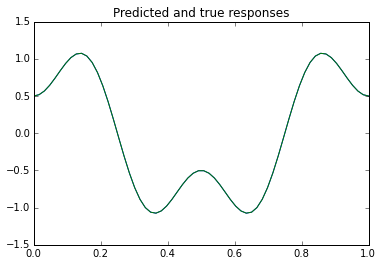

In [10]:
figure()
plot(domain, y2)
plot(domain, result3.ypred)
title('Predicted and true responses')